## Estimador de Kaplan-Meier con grupos

Hasta ahora, vimos cómo podíamos encontrar la probabilidad de supervivencia y la probabilidad de peligro para todas nuestras observaciones. Ahora es el momento de realizar un análisis de nuestros datos para determinar si existe alguna diferencia en la probabilidad de supervivencia si dividimos nuestros datos en grupos en función de características específicas. Dividamos nuestros datos en dos grupos según el sexo: masculino y femenino. Nuestro objetivo aquí es comprobar si existe alguna diferencia significativa en la tasa de supervivencia si dividimos nuestro conjunto de datos en función de la edad.

##### Ejercicio en clase
Hacer el mismo análisis pero agrupando por edades en lugar de por sexo. La idea es ver si existe una diferencia significativa si dividimos lo datos según dos grupos de edad (Adultos = <60 Ancianos = >60)

##### 1) Importe las bibliotecas necesarias

In [1]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the dataset:

data = pd.read_csv("lung.csv")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [2]:
#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


##### Cree dos objetos de Kaplan-Meier-Fitter ():

In [3]:
#Create two objects for groups:

#kmf_ad for adults data:
#kmf_el for elderly data:

kmf_ad = KaplanMeierFitter() 
kmf_el = KaplanMeierFitter() 

##### Dividir los datos en dos grupos

AxesSubplot(0.125,0.125;0.775x0.755)


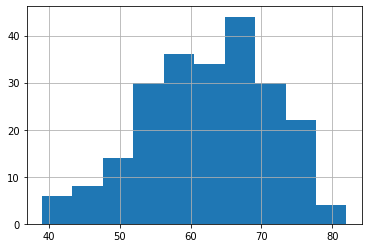

In [4]:
print(data["age"].hist())

In [5]:
#Dividing data into groups:

adults = data[data["age"]<=60]
elderly = data[data["age"] > 60]

#View data of Male group:

adults.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0
8,1.0,218,2,53,1,1.0,70.0,80.0,825.0,16.0,1.0
10,6.0,170,2,57,1,1.0,80.0,80.0,1025.0,27.0,1.0


In [6]:
#View data of Female group:

elderly.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


#####  Encajar datos en nuestros objetos

In [7]:
#Fit data into objects:

kmf_ad.fit(durations =  adults["time"],event_observed = adults["dead"] ,label="Adultos")
kmf_el.fit(durations =  elderly["time"],event_observed = elderly["dead"], label="Ancianos")

<lifelines.KaplanMeierFitter:"Ancianos", fitted with 134 total observations, 33 right-censored observations>

##### Mesa de eventos para el grupo masculino:

In [8]:
#Event table for male group:

kmf_ad.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,94,94
61.0,1,1,0,0,94
71.0,1,1,0,0,93
81.0,2,2,0,0,92
88.0,1,1,0,0,90
...,...,...,...,...,...
765.0,1,1,0,0,5
791.0,1,1,0,0,4
806.0,1,0,1,0,3


In [9]:
#Event table for female group:

kmf_el.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,134,134
5.0,1,1,0,0,134
11.0,3,3,0,0,133
12.0,1,1,0,0,130
13.0,2,2,0,0,129
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


##### Predecir probabilidades de supervivencia:

Ahora podemos predecir la probabilidad de supervivencia de ambos grupos.

In [10]:
kmf_ad.predict(814)

0.08839202994149213

In [11]:
kmf_el.predict(814)

0.05462347688124835

##### Obtenga la lista completa de probabilidades de supervivencia:

##### a) Probabilidad de supervivencia para un grupo de hombres:

In [12]:
kmf_ad.survival_function_

,Adultos
timeline,
0.0,1.000000
61.0,0.989362
71.0,0.978723
81.0,0.957447
88.0,0.946809
...,...
765.0,0.117856
791.0,0.088392
806.0,0.088392


##### Probabilidad de supervivencia para el grupo de mujeres:

In [13]:
kmf_el.survival_function_

,Ancianos
timeline,
0.0,1.000000
5.0,0.992537
11.0,0.970149
12.0,0.962687
13.0,0.947761
...,...
814.0,0.054623
821.0,0.054623
840.0,0.054623


##### Trace la gráfica de probabilidades de supervivencia:

Text(0.5, 1.0, 'KMF')

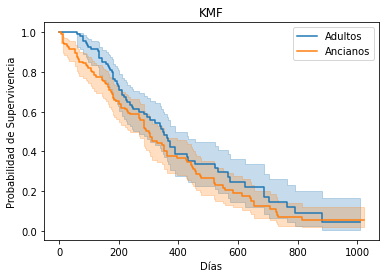

In [14]:
#Plot the survival_function data:

kmf_ad.plot()
kmf_el.plot()

plt.xlabel("Días")
plt.ylabel("Probabilidad de Supervivencia")
plt.title("KMF")

Aquí podemos notar que la probabilidad de que los adultos sobrevivan al cáncer de pulmón es mayor que la de los ancianos. Sin embargo, la diferencia no es del todo significativa, ya que ambos grupos tienen valores aproximados. 

Sin embargo, a partir de estos datos, se podría decir que los investigadores médicos podrían centrarse más en los factores que conducen a las bajas tasas de supervivencia de los pacientes ancianos. Aunque en este caso la edad no es un factor de mucho relevancia.

##### Obtenga la densidad acumulativa:

a) Para el grupo adulto:

In [15]:
kmf_ad.cumulative_density_

,Adultos
timeline,
0.0,0.000000
61.0,0.010638
71.0,0.021277
81.0,0.042553
88.0,0.053191
...,...
765.0,0.882144
791.0,0.911608
806.0,0.911608


b) Para el grupo anciano:

In [16]:
kmf_el.cumulative_density_

,Ancianos
timeline,
0.0,0.000000
5.0,0.007463
11.0,0.029851
12.0,0.037313
13.0,0.052239
...,...
814.0,0.945377
821.0,0.945377
840.0,0.945377


##### Trace el gráfico de densidad acumulada:

Text(0, 0.5, 'Probabilidad')

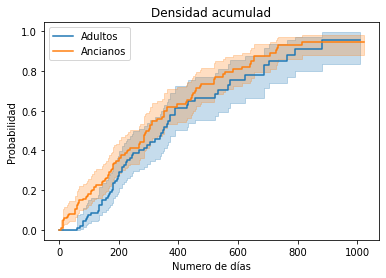

In [17]:
#PLot the graph for cumulative density for both groups:

kmf_ad.plot_cumulative_density()
kmf_el.plot_cumulative_density()
plt.title("Densidad acumulad")
plt.xlabel("Numero de días")
plt.ylabel("Probabilidad")

##### Función de peligro

In [18]:
from lifelines import NelsonAalenFitter

Encaja los datos en nuestros objetos:

In [19]:
naf_ad = NelsonAalenFitter()
naf_el = NelsonAalenFitter()

naf_ad.fit(adults["time"],event_observed = adults["dead"])
naf_el.fit(elderly["time"],event_observed = elderly["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 134 total observations, 33 right-censored observations>

##### Probabilidad de peligro acumulada para ambos grupos

In [20]:
naf_ad.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
61.0,0.010638
71.0,0.021391
81.0,0.043250
88.0,0.054361
...,...
765.0,2.056972
791.0,2.306972
806.0,2.306972


In [21]:
naf_el.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.007463
11.0,0.030191
12.0,0.037883
13.0,0.053448
...,...
814.0,2.800169
821.0,2.800169
840.0,2.800169


##### Trace el gráfico para la probabilidad de peligro acumulada:

Text(0, 0.5, 'Cumulative Hazard')

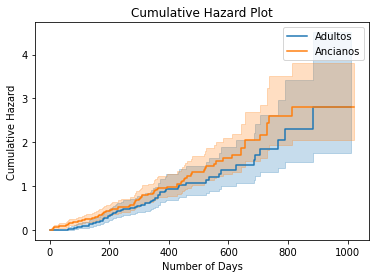

In [22]:
naf_ad.plot_cumulative_hazard(label="Adultos")
naf_el.plot_cumulative_hazard(label="Ancianos")
plt.title("Cumulative Hazard Plot")
plt.xlabel("Number of Days")
plt.ylabel("Cumulative Hazard")

##### El tiempo medio hasta el evento para ambos grupos

In [25]:
kmf_ad.conditional_time_to_event_

,Adultos - Conditional median duration remaining to event
timeline,
0.0,348.0
61.0,292.0
71.0,282.0
81.0,282.0
88.0,275.0
...,...
765.0,118.0
791.0,92.0
806.0,77.0


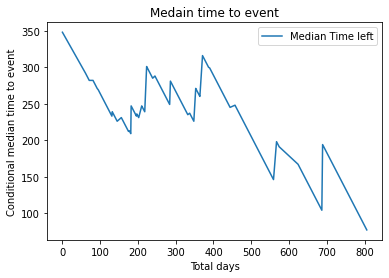

In [27]:
# El gráfico de tiempo medio hasta el evento para el grupo de adultos:
median_time_to_event = kmf_ad.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [29]:
# El tiempo medio hasta el evento para el grupo Anciano:
kmf_el.conditional_time_to_event_

,Ancianos - Conditional median duration remaining to event
timeline,
0.0,301.0
5.0,296.0
11.0,292.0
12.0,291.0
13.0,293.0
...,...
814.0,inf
821.0,inf
840.0,inf


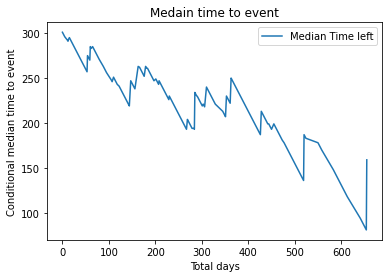

In [30]:
# El gráfico de tiempo medio hasta el evento para el grupo de mujeres:
median_time_to_event = kmf_el.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

##### Probabilidad de supervivencia con intervalo de confianza para ambos grupos

In [32]:
kmf_ad.confidence_interval_survival_function_

,Adultos_lower_0.95,Adultos_upper_0.95
0.0,1.000000,1.000000
61.0,0.926884,0.998495
71.0,0.917600,0.994636
81.0,0.890590,0.983813
88.0,0.876926,0.977509
...,...,...
765.0,0.044097,0.231115
791.0,0.026145,0.198885
806.0,0.026145,0.198885
883.0,0.004599,0.164033


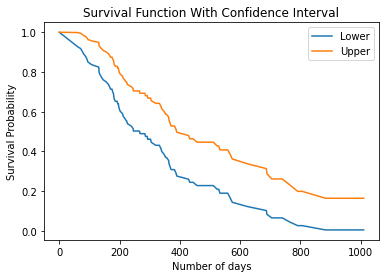

In [40]:
# Gráfico de probabilidad de supervivencia con intervalo de confianza para el grupo de hombres:
confidence_surv_func = kmf_ad.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Adultos_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Adultos_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [36]:
# Probabilidad de supervivencia con intervalo de confianza para el grupo de mujeres:
kmf_el.confidence_interval_survival_function_

,Ancianos_lower_0.95,Ancianos_upper_0.95
0.0,1.000000,1.000000
5.0,0.948212,0.998945
11.0,0.922425,0.988691
12.0,0.912683,0.984297
13.0,0.893551,0.974748
...,...,...
814.0,0.018299,0.120923
821.0,0.018299,0.120923
840.0,0.018299,0.120923
965.0,0.018299,0.120923


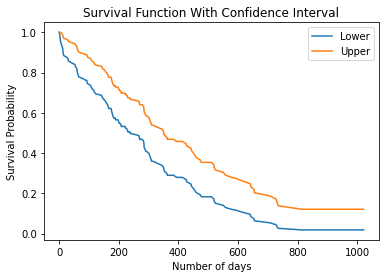

In [39]:
#Gráfico de probabilidad de supervivencia con intervalo de confianza para el grupo de mujeres:
confidence_surv_func = kmf_el.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Ancianos_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Ancianos_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

##### Comparación de densidad acumulada frente a peligro acumulativo:

Text(0.5, 0, 'Number of Days')

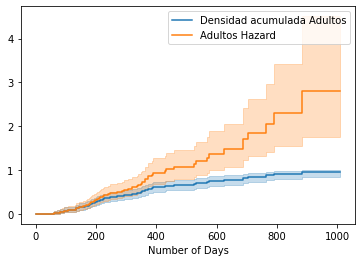

In [41]:
kmf_ad.plot_cumulative_density(label="Densidad acumulada Adultos")
naf_ad.plot_cumulative_hazard(label="Adultos Hazard")
plt.xlabel("Number of Days")

Text(0.5, 0, 'Number of Days')

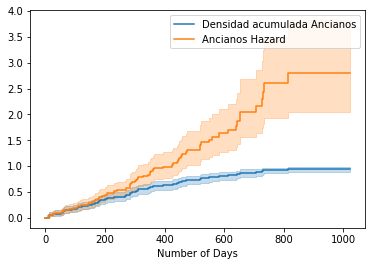

In [42]:
kmf_el.plot_cumulative_density(label="Densidad acumulada Ancianos")
naf_el.plot_cumulative_hazard(label="Ancianos Hazard")
plt.xlabel("Number of Days")

## Prueba de rango logarítmico:

La prueba de rango logarítmico es una prueba de hipótesis que se utiliza para comparar la distribución de supervivencia de dos muestras.

Objetivo: Nuestro objetivo es ver si existe alguna diferencia significativa entre los grupos que se comparan.

Hipótesis nula : La hipótesis nula establece que no hay diferencia significativa entre los grupos estudiados. Si hay una diferencia significativa entre esos grupos, entonces tenemos que rechazar nuestra hipótesis nula.

##### ¿Cómo decimos que hay una diferencia significativa?

Un valor de p entre 0 y 1 denota la significancia estadística. Cuanto menor sea el valor p, más significativa será la diferencia estadística entre los grupos estudiados. Tenga en cuenta que nuestro objetivo es averiguar si existe alguna diferencia entre los grupos que estamos comparando. En caso afirmativo, podemos investigar más sobre por qué hay menos posibilidades de supervivencia para un grupo en particular en función de información diversa como su dieta, estilo de vida y otros.

Menos de (5% = 0.05) valor de P significa que hay una diferencia significativa entre los grupos que comparamos. Podemos dividir nuestros grupos según su sexo, edad, raza, método de tratamiento y otros.

##### Es una prueba para averiguar el valor de P.

In [43]:
# Obtenga las variables para la prueba de rango logarítmico:
Time_A = adults['time']
Event_A = adults['dead']

Time_B = elderly['time']
Event_B = elderly['dead']

In [44]:
from lifelines.statistics import logrank_test

results = logrank_test(Time_A, Time_B, event_observed_A=Event_A, event_observed_B=Event_B)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.83 0.18      2.51

In [45]:
print("P-value :",results.p_value)

P-value : 0.17563274599296763


Hemos comparado las distribuciones de supervivencia de dos grupos diferentes utilizando el famoso método estadístico, la prueba de rango logarítmico. Aquí podemos notar que el valor p es 0.00131 (<0.005) para nuestros grupos, lo que denota que tenemos que rechazar la hipótesis nula y admitir que la función de supervivencia para ambos grupos es significativamente diferente. Los valores p nos dan una fuerte evidencia de que el "sexo" se asoció con el número de días de supervivencia. En resumen, podemos decir que el "sexo" de una persona marca una diferencia significativa en la probabilidad de supervivencia.